In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
import re
import string

In [2]:
df=pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1','v2']]
df.columns = ['target' , 'text']
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


## 1. Data Cleansing

In [3]:
df['target'] =df['target'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    text = text.lower()
    text =re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('','', string.punctuation))
    text = text.strip()
    return text

df['text']= df['text'].apply(clean_text)

In [4]:
print(df.head())

   target                                               text
0       0  go until jurong point crazy available only in ...
1       0                            ok lar joking wif u oni
2       1  free entry in  a wkly comp to win fa cup final...
3       0        u dun say so early hor u c already then say
4       0  nah i dont think he goes to usf he lives aroun...


In [5]:
X = df['text']
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [6]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_vect, Y_train)

MultinomialNB()

In [8]:
Y_pred =model.predict(X_test_vect)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy:\n{accuracy}')

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy:
0.9820627802690582
Confusion Matrix:
[[960   5]
 [ 15 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
def predict_text(text):
    cleaned_text = clean_text(text)
    vect_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vect_text)
    return 'spam' if prediction[0] == 1 else 'ham'

text = "congratulations! You've Won a $1000 Walmart gift card. Click here to claim your prize."
print(predict_text(text))

spam


## 2. EDA

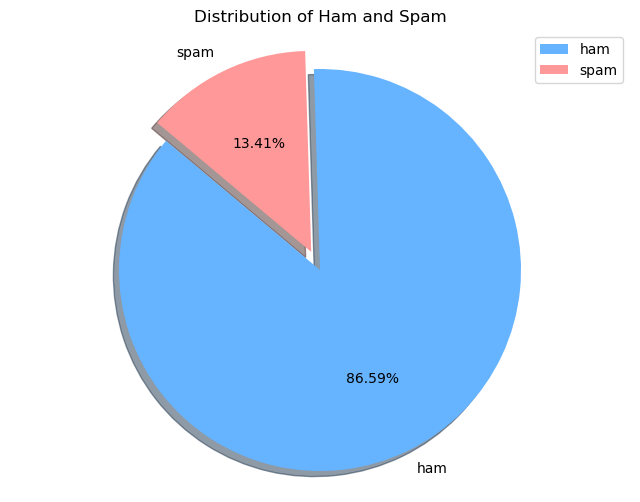

In [10]:
import matplotlib.pyplot as plt
target_counts = df['target'].value_counts()
labels = ['ham', 'spam']
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct='%0.2f%%', startangle=140, 
        colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Ham and Spam')
plt.legend(labels, loc="best")
plt.axis('equal') 
plt.show()

In [11]:
# Data is imbalanced

In [12]:
import nltk

In [13]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
df['num_characters'] = df['text'].apply(len)

In [15]:
df.head()

,target,text,num_characters
0,0,go until jurong point crazy available only in ...,102
1,0,ok lar joking wif u oni,23
2,1,free entry in a wkly comp to win fa cup final...,124
3,0,u dun say so early hor u c already then say,43
4,0,nah i dont think he goes to usf he lives aroun...,59


In [16]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:

df.head()

,target,text,num_characters,num_words
0,0,go until jurong point crazy available only in ...,102,20
1,0,ok lar joking wif u oni,23,6
2,1,free entry in a wkly comp to win fa cup final...,124,25
3,0,u dun say so early hor u c already then say,43,11
4,0,nah i dont think he goes to usf he lives aroun...,59,13


In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,102,20,1
1,0,ok lar joking wif u oni,23,6,1
2,1,free entry in a wkly comp to win fa cup final...,124,25,1
3,0,u dun say so early hor u c already then say,43,11,1
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,73.660445,14.882986,0.999462
std,54.733872,10.800468,0.023199
min,0.000000,0.000000,0.000000
25%,33.000000,7.000000,1.000000
50%,57.000000,12.000000,1.000000
75%,111.000000,21.000000,1.000000
max,888.000000,171.000000,1.000000


In [21]:

# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,66.865285,13.852850,0.999378
std,54.820275,11.048584,0.024930
min,0.000000,0.000000,0.000000
25%,31.000000,7.000000,1.000000
50%,49.000000,10.000000,1.000000
75%,87.000000,18.000000,1.000000
max,888.000000,171.000000,1.000000


In [22]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.0
mean,117.551539,21.536814,1.0
std,26.663547,5.527622,0.0
min,3.000000,1.000000,1.0
25%,108.500000,19.000000,1.0
50%,125.000000,23.000000,1.0
75%,135.000000,25.000000,1.0
max,186.000000,32.000000,1.0


In [23]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


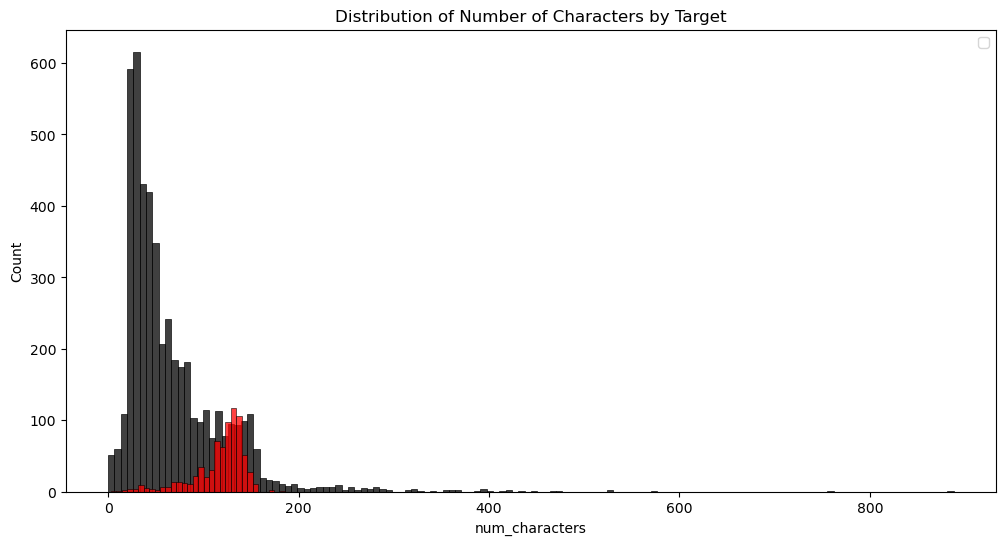

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='black')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.title('Distribution of Number of Characters by Target')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


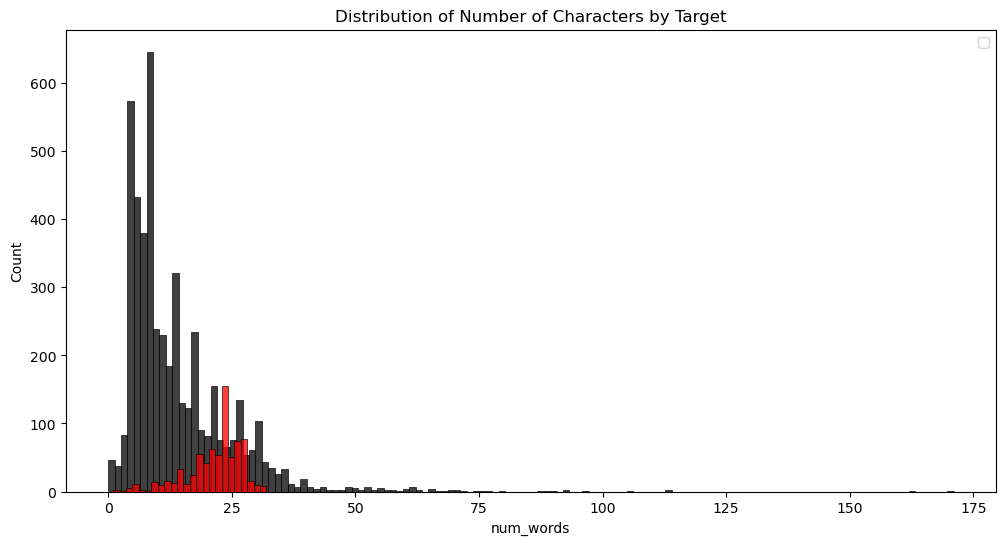

In [25]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='black')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.title('Distribution of Number of Characters by Target')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

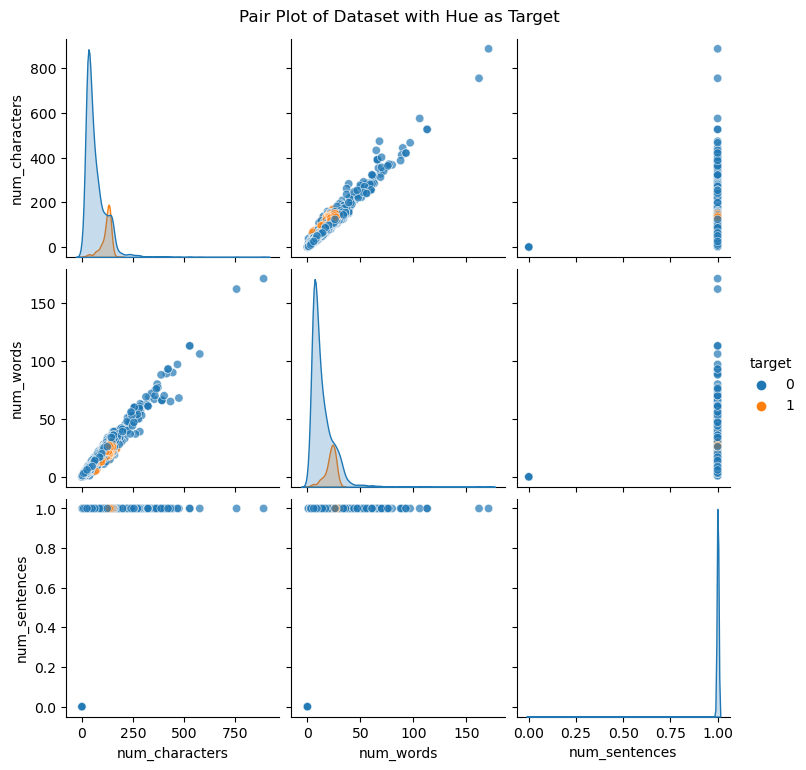

In [26]:
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(
    df,
    hue='target',
    diag_kind='kde',
    plot_kws={'alpha': 0.7})
pair_plot.fig.suptitle("Pair Plot of Dataset with Hue as Target", y=1.02)
plt.show()

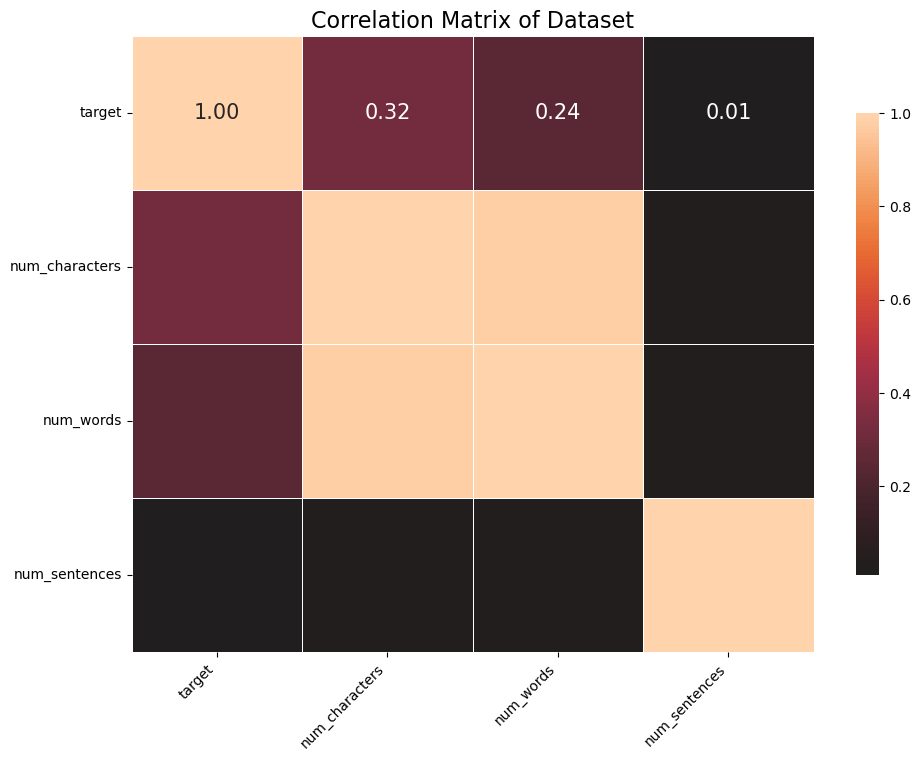

In [27]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(11, 8))
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    center=0, 
    linewidths=0.5,  
    cbar_kws={"shrink": 0.75},  
    annot_kws={"size": 15})
plt.title('Correlation Matrix of Dataset', size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## 3.Data Processing
    `Lower Case
    `Tokenization
    `Removing special characters
    `Removing stop words and punctuation
    `Stemming

In [28]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
transform_text(' I loved and enjoyed it a little too much!!')

'love enjoy littl much'

In [32]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
df['text'][00]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('danceing')

'danc'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in a wkly comp to win fa cup final...,124,25,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1,nah dont think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width =600, height=600, min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

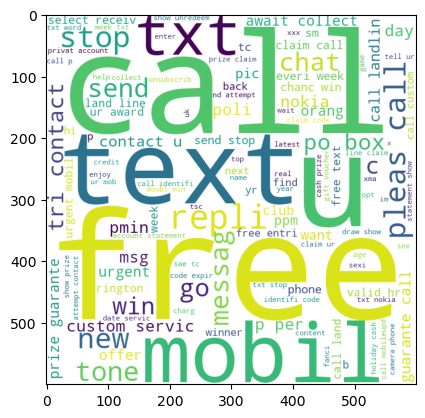

In [39]:
plt.imshow(spam_wc)

In [40]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

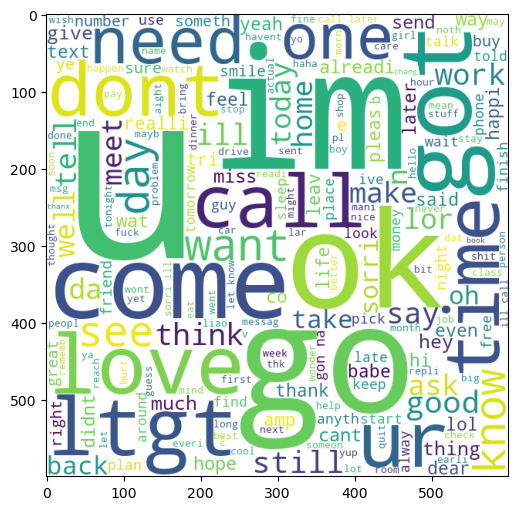

In [41]:
plt.figure(figsize= (12,6))
plt.imshow(spam_wc)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,go until jurong point crazy available only in ...,102,20,1,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,23,6,1,ok lar joke wif u oni
2,1,free entry in a wkly comp to win fa cup final...,124,25,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say so early hor u c already then say,43,11,1,u dun say earli hor u c alreadi say
4,0,nah i dont think he goes to usf he lives aroun...,59,13,1,nah dont think goe usf live around though


In [43]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [44]:
len(spam_corpus)

10600

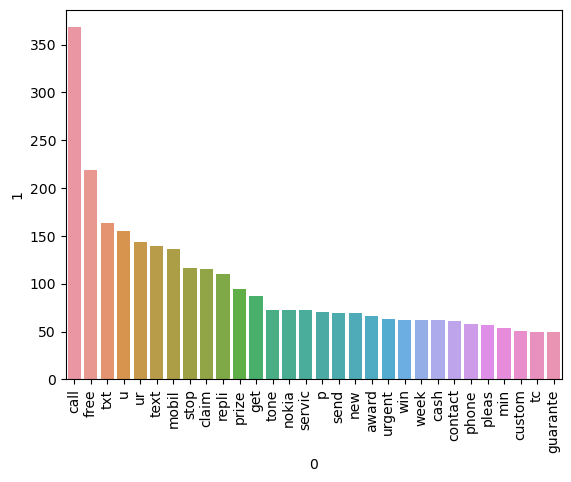

In [45]:
from collections import Counter
sns.barplot(x= (pd.DataFrame(Counter(spam_corpus).most_common(30))[0]),
             y = (pd.DataFrame(Counter(spam_corpus).most_common(30))[1]), data=df)
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [47]:
len(ham_corpus)

38795

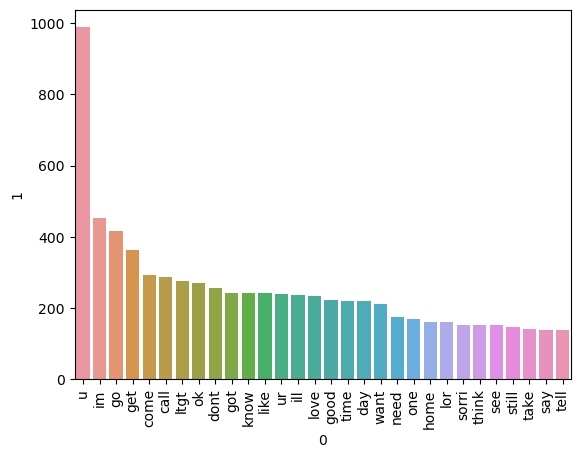

In [48]:
from collections import Counter
sns.barplot(x= (pd.DataFrame(Counter(ham_corpus).most_common(30))[0]),
             y = (pd.DataFrame(Counter(ham_corpus).most_common(30))[1]), data=df)
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [50]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [51]:
X.shape

(5572, 7022)

In [52]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
from sklearn.datasets import load_iris

iris = load_iris()
X= iris.data
y= iris.target

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =42)

In [55]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1, average='macro'))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2, average='macro'))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3,  average='macro'))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [60]:
#tfidf = MNB
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
svc = SVC(kernel ='sigmoid', gamma =0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc =  DecisionTreeClassifier(max_depth =5)
lrc_l1 = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [63]:
clf = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l2')  # Correct penalty value
}

In [64]:
clf = {
    'SVC' : svc,
    'KN' : knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc_l1,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC':bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
# Initialize lists to store the results
accuracies = []
precisions = []

# Define the function to train and evaluate the classifiers
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0) 
    return accuracy, precision


In [66]:
for name, model in clf.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)

    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precision -  ", current_precision)
    
    accuracies.append((current_accuracy))
    precisions.append((current_precision))

For  SVC
Accuracy -  0.3
Precision -   0.09999999999999999
For  KN
Accuracy -  1.0
Precision -   1.0
For  NB
Accuracy -  0.9
Precision -   0.9166666666666666
For  DT
Accuracy -  1.0
Precision -   1.0
For  LR
Accuracy -  1.0
Precision -   1.0
For  RF
Accuracy -  1.0
Precision -   1.0
For  AdaBoost
Accuracy -  1.0
Precision -   1.0
For  BgC
Accuracy -  1.0
Precision -   1.0
For  ETC
Accuracy -  1.0
Precision -   1.0
For  GBDT
Accuracy -  1.0
Precision -   1.0
For  xgb
Accuracy -  1.0
Precision -   1.0


In [67]:
# Calculate accuracy and precision scores for each classifier
accuracy_scores = [train_classifier(model, X_train, y_train, X_test, y_test)[0] for model in clf.values()]
precision_scores = [train_classifier(model, X_train, y_train, X_test, y_test)[1] for model in clf.values()]

performance_df = pd.DataFrame({'Algorithm': clf.keys(), 
                               'Accuracy':accuracy_scores, 
                               'Precision':precision_scores})

In [68]:
# Sort the DataFrame by Precision in descending order
performance_df = performance_df.sort_values('Precision', ascending=False)

In [69]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,1.0,1.000000
3,DT,1.0,1.000000
4,LR,1.0,1.000000
5,RF,1.0,1.000000
6,AdaBoost,1.0,1.000000
7,BgC,1.0,1.000000
8,ETC,1.0,1.000000
9,GBDT,1.0,1.000000
10,xgb,1.0,1.000000
2,NB,0.9,0.916667


In [70]:
performance_df1 = performance_df.copy()

In [71]:
performance_df1= pd.melt(performance_df1, id_vars ="Algorithm")

In [72]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,1.000000
1,DT,Accuracy,1.000000
2,LR,Accuracy,1.000000
3,RF,Accuracy,1.000000
4,AdaBoost,Accuracy,1.000000
5,BgC,Accuracy,1.000000
6,ETC,Accuracy,1.000000
7,GBDT,Accuracy,1.000000
8,xgb,Accuracy,1.000000
9,NB,Accuracy,0.900000


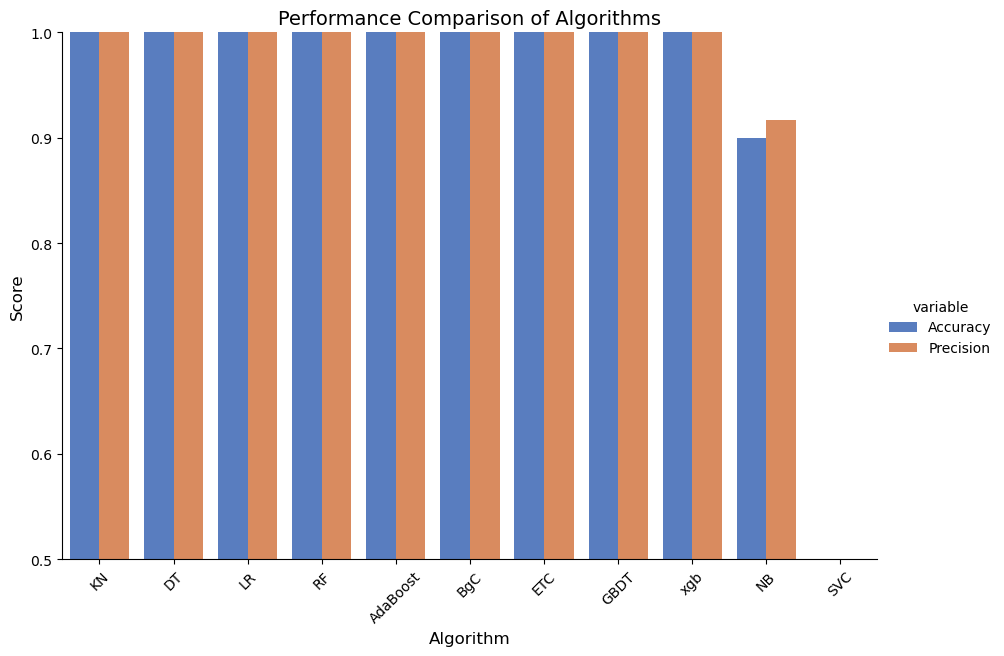

In [73]:
custom_palette = sns.color_palette("muted")

sns.catplot(x ='Algorithm', y='value',
           hue = 'variable', data =performance_df1, kind ='bar' , height=6, aspect=1.5, palette=custom_palette)

plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Performance Comparison of Algorithms', fontsize=14)

plt.ylim(0.5,1.0)
plt.xticks(rotation=45)
plt.show()

In [74]:
#voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [75]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb), ('et',etc)], voting ='soft')

In [77]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [78]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred, average='macro'))

Accuracy 1.0
Precision 1.0


In [79]:
#Applying stacking
estimators = [('svm', svc), ('nb',mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
model = StackingClassifier(estimators= estimators, final_estimator=final_estimator)

In [82]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred, average='macro'))

Accuracy 1.0
Precision 1.0


In [86]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [87]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer  # Corrected import statement
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1","Sample text 2", "Sample text 3"]
y_train = [1, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
